In [200]:
import pandas as pd
import numpy as np

In [201]:
data=pd.read_csv('feature_engineering0212.csv')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
final=pd.read_csv('data_cleaned_3.csv')

In [203]:
final[pd.isnull(final.overall_time_min)]

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,send2update_time_min_na,overall_time_max_na,update2create_time_max_na,send2update_time_max_na,pca_1,pca_2,pca_3,pca_4,pca_5,label.1


In [204]:
len(final[final['send2update_time_min']<0])

16229

In [205]:
len(final[final['send2update_time_min']>=0])

175626

In [206]:
data_daily=data.filter(like='count', axis=1).fillna(0)

In [207]:
data_daily.head()

,04/04/2016count,04/05/2016count,04/06/2016count,04/07/2016count,04/08/2016count,04/09/2016count,04/10/2016count,04/11/2016count,04/12/2016count,04/13/2016count,...,06/03/2016count,06/04/2016count,06/05/2016count,06/06/2016count,06/07/2016count,06/08/2016count,06/09/2016count,06/10/2016count,06/11/2016count,06/12/2016count
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [208]:
data_daily.isnull().any()

04/04/2016count    False
04/05/2016count    False
04/06/2016count    False
04/07/2016count    False
04/08/2016count    False
04/09/2016count    False
04/10/2016count    False
04/11/2016count    False
04/12/2016count    False
04/13/2016count    False
04/14/2016count    False
04/15/2016count    False
04/16/2016count    False
04/17/2016count    False
04/18/2016count    False
04/19/2016count    False
04/20/2016count    False
04/21/2016count    False
04/22/2016count    False
04/23/2016count    False
04/24/2016count    False
04/25/2016count    False
04/26/2016count    False
04/27/2016count    False
04/28/2016count    False
04/29/2016count    False
04/30/2016count    False
05/01/2016count    False
05/02/2016count    False
05/03/2016count    False
                   ...  
05/14/2016count    False
05/15/2016count    False
05/16/2016count    False
05/17/2016count    False
05/18/2016count    False
05/19/2016count    False
05/20/2016count    False
05/21/2016count    False
05/22/2016count    False


In [209]:
cols=[ '05/30/2016',
 '05/31/2016',
 '06/01/2016',
 '06/02/2016',
 '06/03/2016',
 '06/04/2016',
 '06/05/2016',
 '06/06/2016',
 '06/07/2016',
 '06/08/2016',
 '06/09/2016',
 '06/10/2016',
 '06/11/2016',
 '06/12/2016']

In [210]:
len(cols)

14

In [211]:
cols=[i+'count' for i in cols]

In [212]:
cols

['05/30/2016count',
 '05/31/2016count',
 '06/01/2016count',
 '06/02/2016count',
 '06/03/2016count',
 '06/04/2016count',
 '06/05/2016count',
 '06/06/2016count',
 '06/07/2016count',
 '06/08/2016count',
 '06/09/2016count',
 '06/10/2016count',
 '06/11/2016count',
 '06/12/2016count']

In [213]:
data_daily=data_daily[cols]

In [214]:
data_daily.head()

,05/30/2016count,05/31/2016count,06/01/2016count,06/02/2016count,06/03/2016count,06/04/2016count,06/05/2016count,06/06/2016count,06/07/2016count,06/08/2016count,06/09/2016count,06/10/2016count,06/11/2016count,06/12/2016count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [215]:
final.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,send2update_time_min_na,overall_time_max_na,update2create_time_max_na,send2update_time_max_na,pca_1,pca_2,pca_3,pca_4,pca_5,label.1
0,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,2.0,...,0,0,0,0,-128653.255150,-186401.491722,-12622.457990,852.860985,200.624937,0.0
1,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,3.0,...,0,0,0,0,-104047.073574,-185396.060384,46178.230062,-40501.194650,-3141.241625,0.0
2,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,2.0,...,0,0,0,0,-122307.004921,-186072.180099,3095.386811,-4975.230657,392.257336,0.0
3,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,0.0,...,0,0,0,0,-124827.572391,-186177.628090,-1953.514050,-3253.237032,23.748551,1.0
4,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,0.0,...,0,0,0,0,-130252.590024,-186407.399275,-13690.863239,2280.703953,196.324882,1.0


In [216]:
data.head()

,Unnamed: 0,user_id,city_id,sex,age,occupation,invite_id,invite_code,login_platform,last_login,...,06/11/2016count,06/11/2016send_type_mode,06/11/2016couponworth_sum,06/11/2016ticketfee_sum,06/11/2016couponfee_sum,06/12/2016count,06/12/2016send_type_mode,06/12/2016couponworth_sum,06/12/2016ticketfee_sum,06/12/2016couponfee_sum
0,0,100002020,0,1,80,互联网,0,9828.0,Android,2016-07-04 17:53:27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,100002033,0,0,NaN,NaN,0,6126.0,iOS,2017-05-12 00:42:20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,100002035,0,0,NaN,NaN,0,3227.0,iOS,2016-01-13 17:29:46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,100002036,0,0,NaN,NaN,0,3844.0,iOS,2017-04-19 12:59:09.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0
4,20,100002040,0,2,90,上班族,0,4316.0,Android,2017-02-13 16:56:55.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0


In [217]:
data_daily.isnull().any()

05/30/2016count    False
05/31/2016count    False
06/01/2016count    False
06/02/2016count    False
06/03/2016count    False
06/04/2016count    False
06/05/2016count    False
06/06/2016count    False
06/07/2016count    False
06/08/2016count    False
06/09/2016count    False
06/10/2016count    False
06/11/2016count    False
06/12/2016count    False
dtype: bool

In [218]:
final2=pd.concat([final, data_daily], axis=1)

In [219]:
final2.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,06/03/2016count,06/04/2016count,06/05/2016count,06/06/2016count,06/07/2016count,06/08/2016count,06/09/2016count,06/10/2016count,06/11/2016count,06/12/2016count
0,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [220]:
len(final)

191855

In [221]:
len(data_daily)

191855

In [222]:
final2.isnull().any().tolist()

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [223]:
weeks=['w1','w2','w3','w4','w5','w6','w7']
for week in weeks:
    #if(final2[week+'_total_orders'])
    #final2[week+'_avg_couponworth']=final2[week+'_total_couponworth']/final2[week+'_total_orders']
    final2.loc[final2[week+'_total_orders']==0,week+'_avg_couponworth']=0
    final2.loc[final2[week+'_total_orders']!=0,week+'_avg_couponworth']=final2[week+'_total_couponworth']/final2[week+'_total_orders']

In [224]:
final2.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,06/10/2016count,06/11/2016count,06/12/2016count,w1_avg_couponworth,w2_avg_couponworth,w3_avg_couponworth,w4_avg_couponworth,w5_avg_couponworth,w6_avg_couponworth,w7_avg_couponworth
0,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,2.0,...,0.0,0.0,0.0,11.25,8.5,7.500000,5.5,8.000000,0.00,0.000
1,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,3.0,...,0.0,0.0,0.0,3.75,3.8,2.666667,15.0,5.333333,6.50,0.000
2,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,2.0,...,0.0,0.0,0.0,13.50,12.5,11.500000,0.0,9.000000,12.50,0.000
3,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,0.000000,0.0,0.000000,1.25,0.000
4,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,0.000000,1.5,3.500000,2.48,3.712


In [225]:
data_coupon=data.filter(like='couponworth', axis=1).fillna(0)

In [226]:
maxcoupon={}
for i in range(len(weeks)):
    maxcoupon[weeks[i]]=data_coupon.columns.tolist()[i*10:(i*10+10)]
    

In [227]:
for i in range(len(weeks)):
    final2[weeks[i]+'_max_couponworth']=data_coupon[maxcoupon[weeks[i]]].max(axis=1)


In [228]:
final2.loc[(final2['city_id']==310100)|(final2['city_id']==440300)|(final2['city_id']==330100),'city_id']=0

In [229]:
final2.loc[final2['last_send_type']!=1,'last_send_type']=0

In [230]:
final2.loc[final2['city_id']!=0,'city_id']=1

In [231]:
final2.last_send_type.unique()

array([1, 0])

In [232]:
final2.city_id.unique()

array([0, 1])

In [233]:
final2.columns

Index(['order_sd', 'active_days', 'lastgap', 'avg_gap', 'min_gap', 'max_gap',
       'total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth',
       'label', 'first_order', 'last_order', 'accountLength',
       'overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max',
       'intime_rate', 'last_coupon_fee', 'last_send_type', 'order_nums',
       'city_id', 'sex', 'age', 'login_platform_b', 'app_version_b', 'age_na',
       'lastgap_na', 'avg_gap_na', 'min_gap_na', 'max_gap_na',
       'overall_time_mean_na', 'update

order_sd


/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


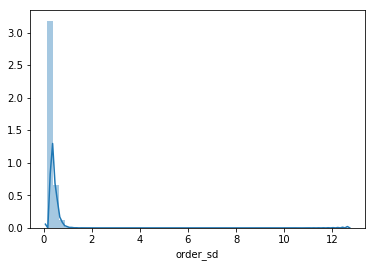

active_days


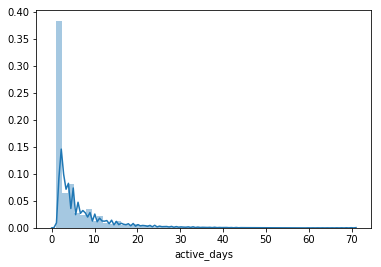

lastgap


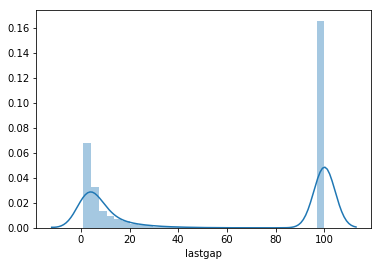

avg_gap


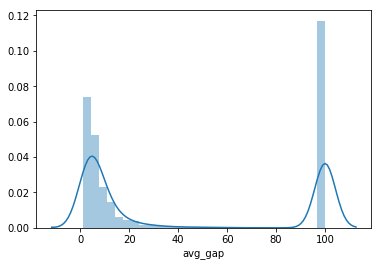

min_gap


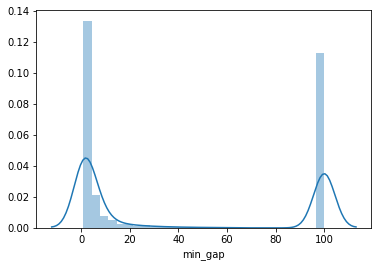

max_gap


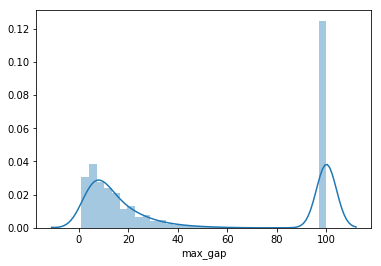

total_orders


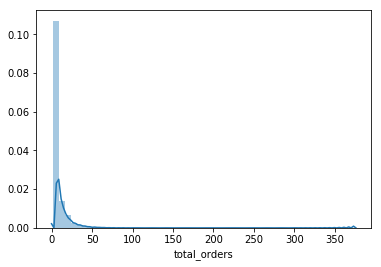

w1_total_orders


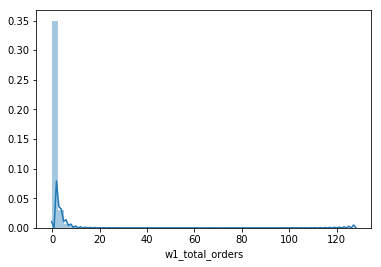

w2_total_orders


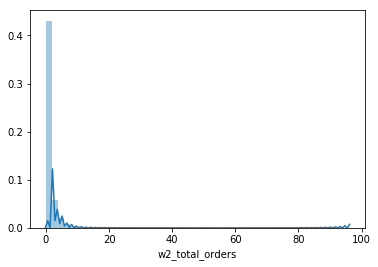

w3_total_orders


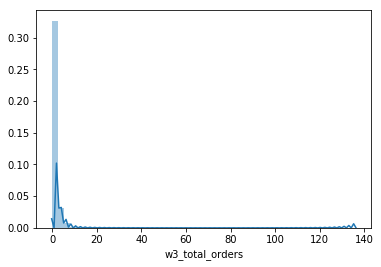

w4_total_orders


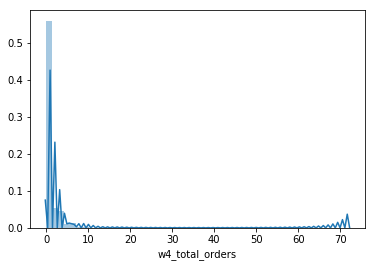

w5_total_orders


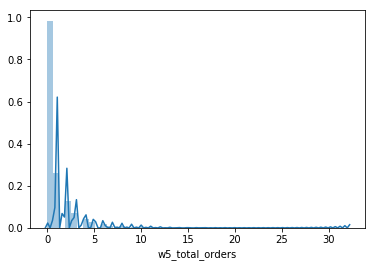

w6_total_orders


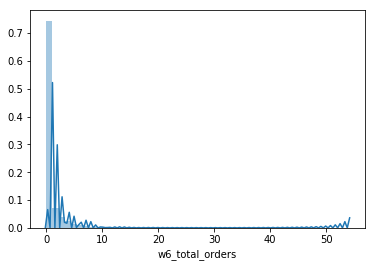

w7_total_orders


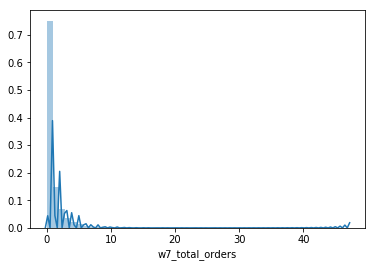

total_couponworth


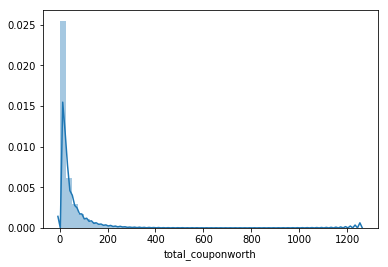

w1_total_couponworth


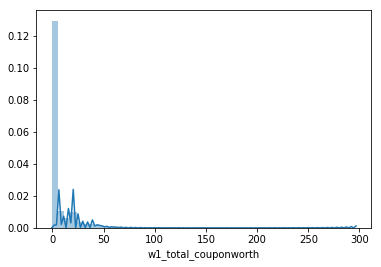

w2_total_couponworth


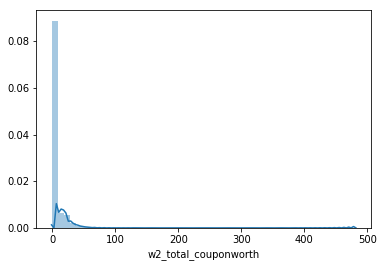

w3_total_couponworth


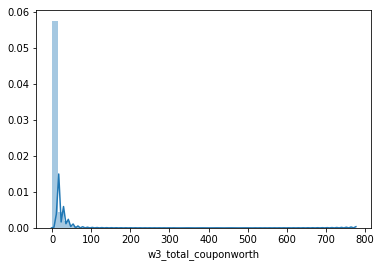

w4_total_couponworth


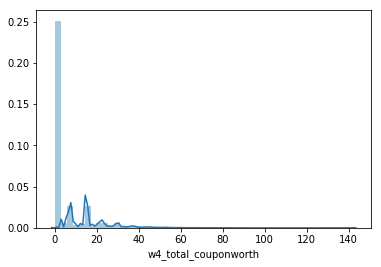

w5_total_couponworth


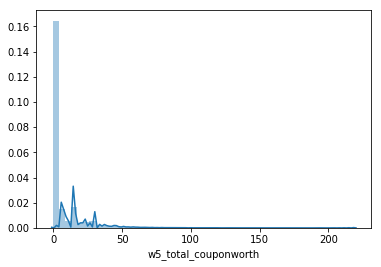

w6_total_couponworth


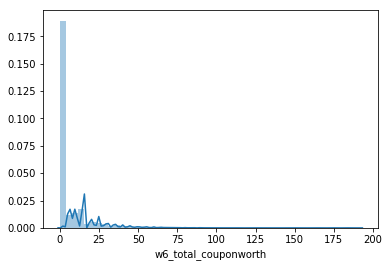

w7_total_couponworth


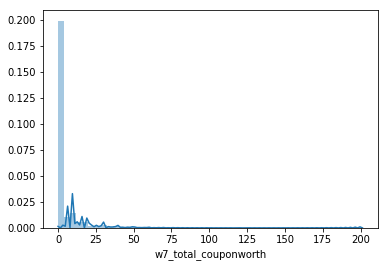

first_order


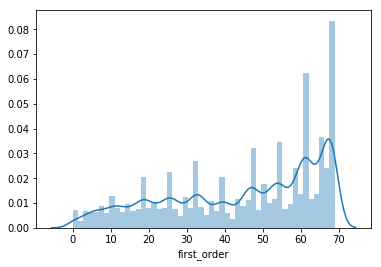

last_order


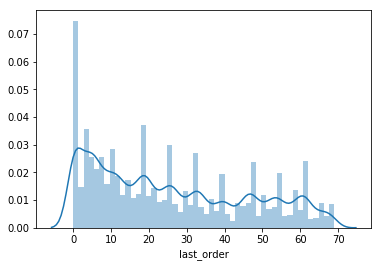

accountLength


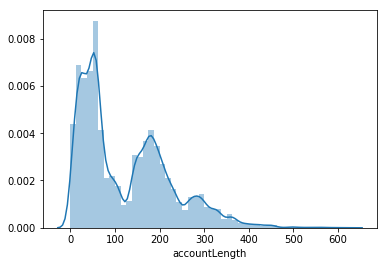

overall_time_mean


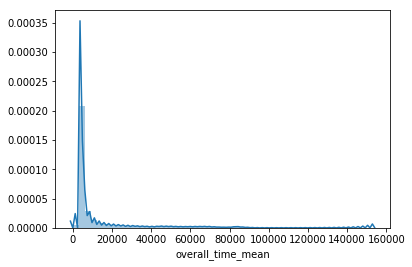

update2create_time_mean


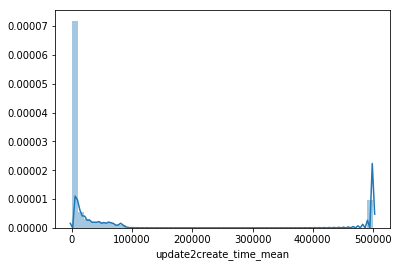

send2update_time_mean


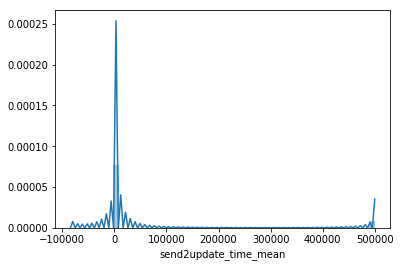

overall_time_min


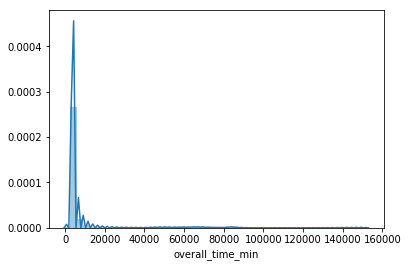

update2create_time_min


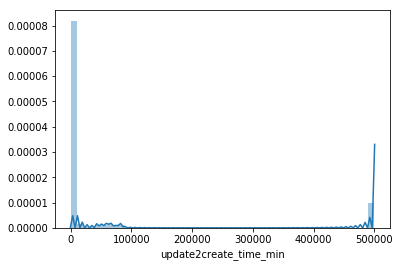

send2update_time_min


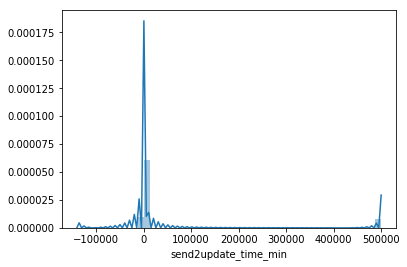

overall_time_max


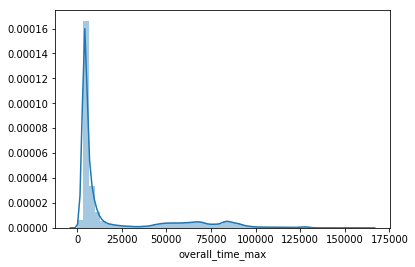

update2create_time_max


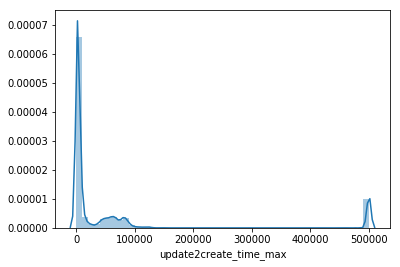

send2update_time_max


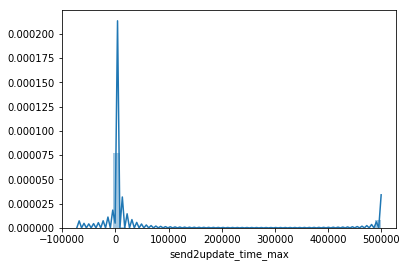

intime_rate


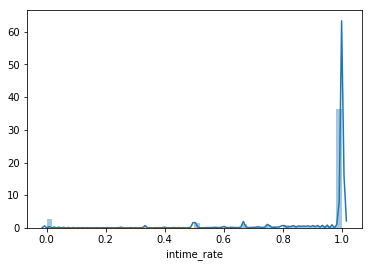

last_coupon_fee


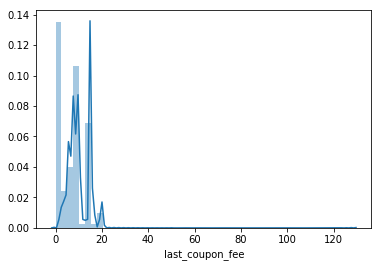

order_nums


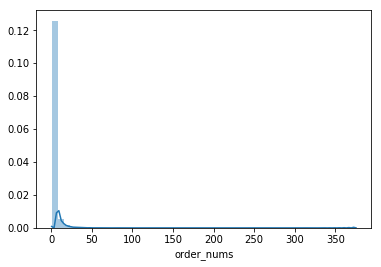

sex


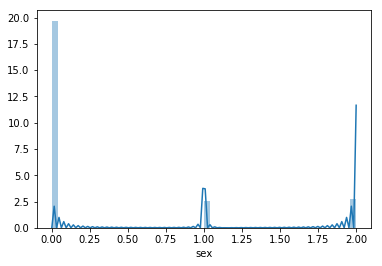

age


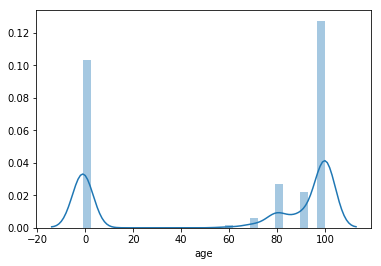

login_platform_b


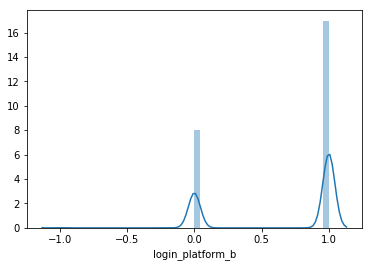

pca_1


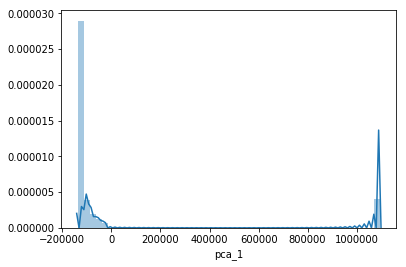

pca_2


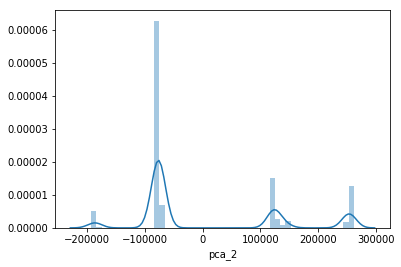

pca_3


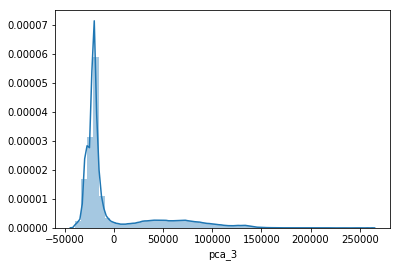

pca_4


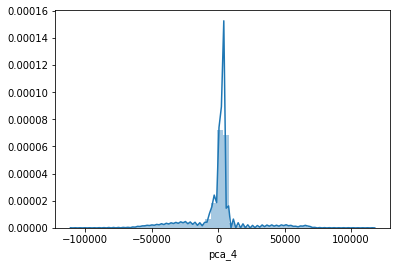

pca_5


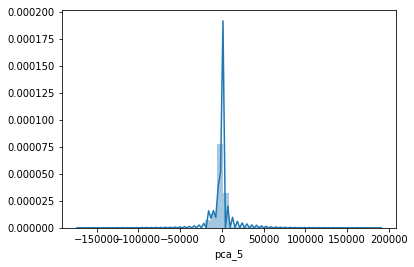

05/30/2016count


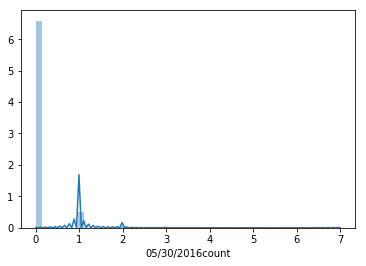

05/31/2016count


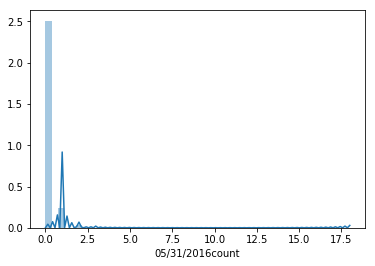

06/01/2016count


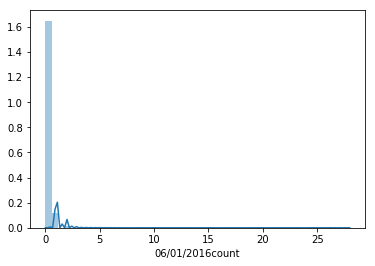

06/02/2016count


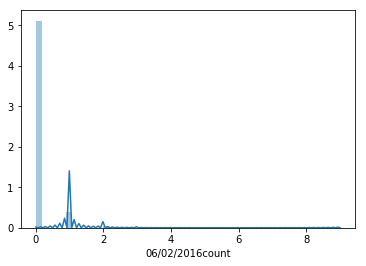

06/03/2016count


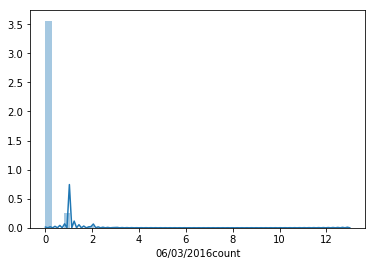

06/04/2016count


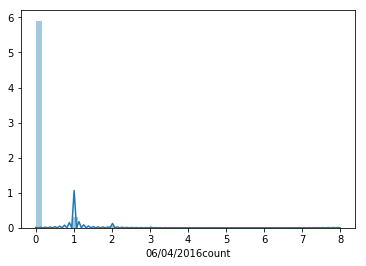

06/05/2016count


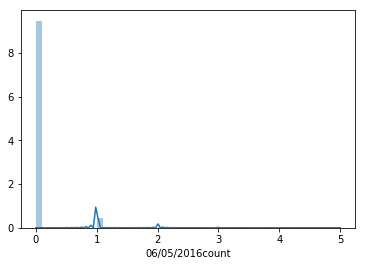

06/06/2016count


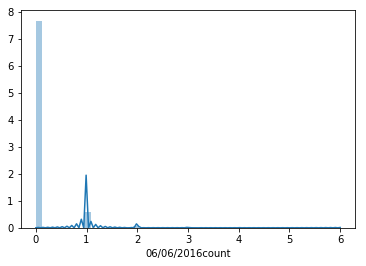

06/07/2016count


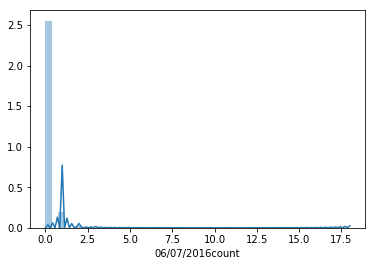

06/08/2016count


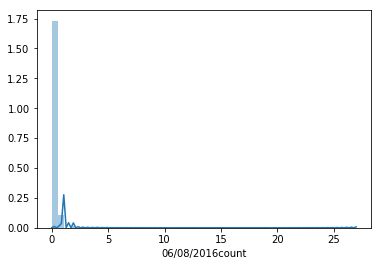

06/09/2016count


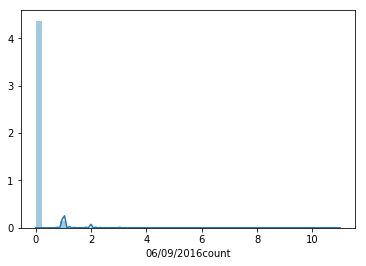

06/10/2016count


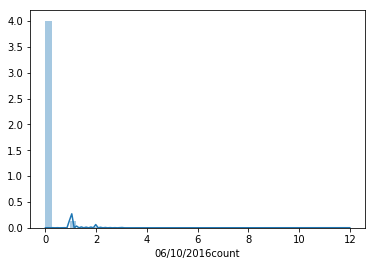

06/11/2016count


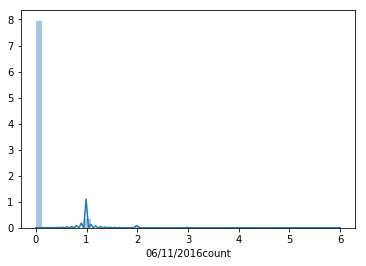

06/12/2016count


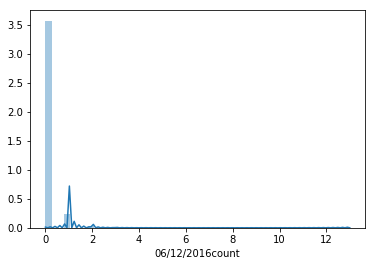

w1_avg_couponworth


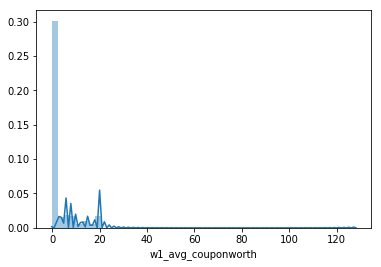

w2_avg_couponworth


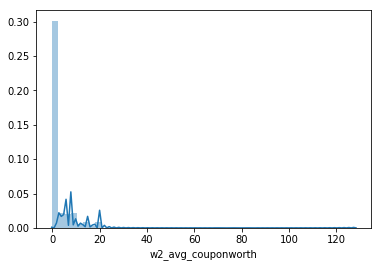

w3_avg_couponworth


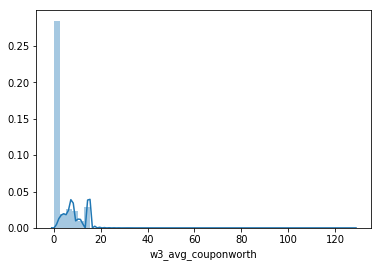

w4_avg_couponworth


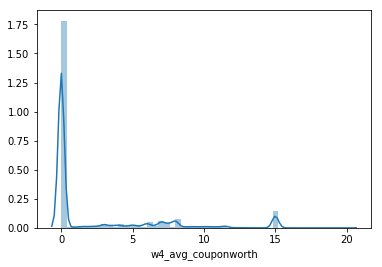

w5_avg_couponworth


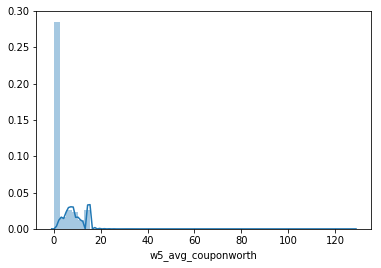

w6_avg_couponworth


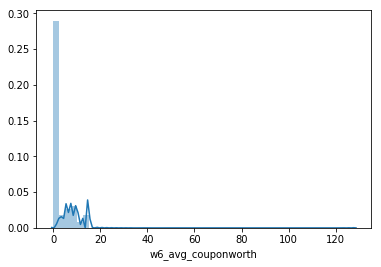

w7_avg_couponworth


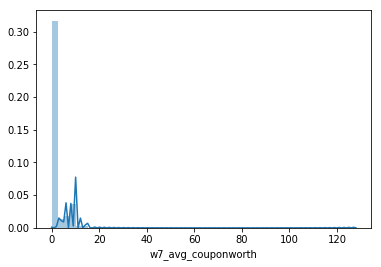

w1_max_couponworth


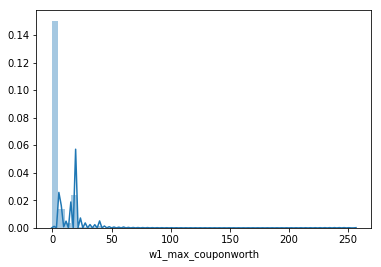

w2_max_couponworth


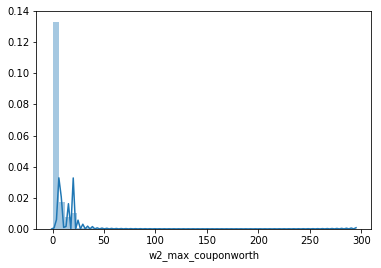

w3_max_couponworth


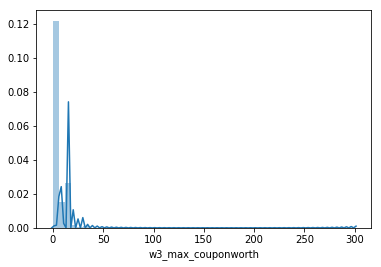

w4_max_couponworth


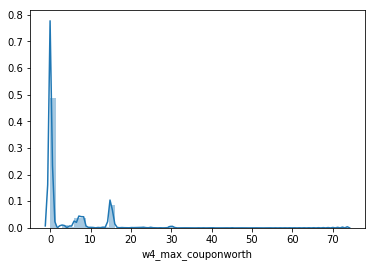

w5_max_couponworth


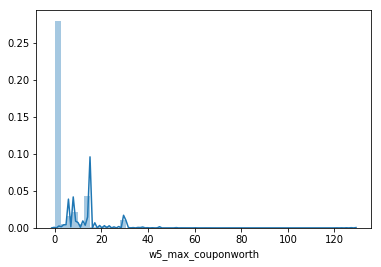

w6_max_couponworth


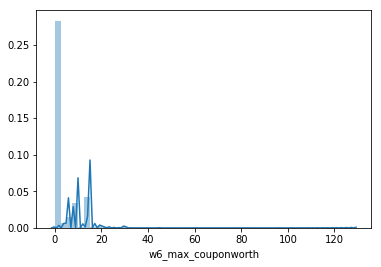

w7_max_couponworth


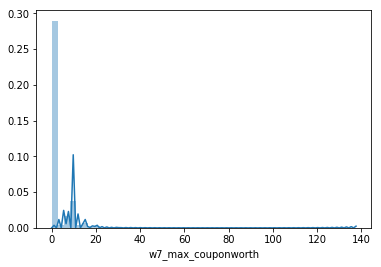

In [234]:
from string import ascii_letters
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for col in final2.columns:
    if len(final2[col].unique())>2:
        print(col)
        sns.distplot(final2[col])
        plt.show()

In [235]:
peak1=['order_sd',
'active_days',
'total_orders',
'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders',
'first_order',
'last_order',
'accountLength',
'overall_time_mean',
'overall_time_min',
'overall_time_max',
'intime_rate',
'last_coupon_fee',
'order_nums',
'w1_avg_couponworth',
       'w2_avg_couponworth', 'w3_avg_couponworth', 'w4_avg_couponworth',
       'w5_avg_couponworth', 'w6_avg_couponworth', 'w7_avg_couponworth',
       'w1_max_couponworth', 'w2_max_couponworth', 'w3_max_couponworth',
       'w4_max_couponworth', 'w5_max_couponworth', 'w6_max_couponworth',
       'w7_max_couponworth']

In [236]:
for col in peak1:
    if col!='overall_time_min':
        final2['log_'+col]=np.log(final2[col]+1)
    else:
        final2['log_'+col]=np.log(final2[col]-final2[col].min()+1)

In [237]:
final2=final2.drop(['total_orders','total_couponworth','w1_total_couponworth',
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth'],axis=1)

In [238]:
peak2_1=['lastgap','avg_gap','min_gap','max_gap']
for col in peak2_1:
    final2.loc[final2[col]<=60,'dummy_log_'+col]=1
    final2.loc[final2[col]>60,'dummy_log_'+col]=0
    final2['log_'+col]=final2[col]
    final2.loc[final2['dummy_log_'+col]==1,'log_'+col]=np.log(final2[col]+1)
    #np.log(final2[col]+1)

In [239]:
peak2_2=['update2create_time_mean','send2update_time_mean','update2create_time_min','send2update_time_min','update2create_time_max','send2update_time_max']
for col in peak2_2:
    final2.loc[final2[col]<500000,'dummy_log_'+col]=1
    final2.loc[final2[col]>=500000,'dummy_log_'+col]=0
    final2['log_'+col]=final2[col]
    final2.loc[final2['dummy_log_'+col]==1,'log_'+col]=np.log1p(final2[col]-final2[col].min()+1)
    #np.log(final2[col]+1)

In [240]:
final2[pd.isnull(final2.log_overall_time_min)]

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,w1_total_orders,w2_total_orders,w3_total_orders,w4_total_orders,...,dummy_log_send2update_time_mean,log_send2update_time_mean,dummy_log_update2create_time_min,log_update2create_time_min,dummy_log_send2update_time_min,log_send2update_time_min,dummy_log_update2create_time_max,log_update2create_time_max,dummy_log_send2update_time_max,log_send2update_time_max


In [241]:
final2.to_csv('data_final.csv',index=False)

In [242]:
len(final2)

191855

In [ ]:
['order_sd',
'active_days',
'total_orders',
'w1_total_orders', 'w2_total_orders', 'w3_total_orders',
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',
       'w7_total_orders',
'first_order',
'last_order',
'accountLength',
'overall_time_mean',
'overall_time_min',
'overall_time_max',
'intime_rate',
'last_coupon_fee',
'order_nums',
'w1_avg_couponworth',
       'w2_avg_couponworth', 'w3_avg_couponworth', 'w4_avg_couponworth',
       'w5_avg_couponworth', 'w6_avg_couponworth', 'w7_avg_couponworth',
       'w1_max_couponworth', 'w2_max_couponworth', 'w3_max_couponworth',
       'w4_max_couponworth', 'w5_max_couponworth', 'w6_max_couponworth',
       'w7_max_couponworth','lastgap','avg_gap','min_gap','max_gap','update2create_time_mean','send2update_time_mean','update2create_time_min','send2update_time_min','update2create_time_max','send2update_time_max']

In [243]:
np.log(-30)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan